In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
data = pd.read_csv('./Data/USArrests.csv',index_col=0)

In [119]:
def pca_calc(X,n_components=2):
    pca = PCA(n_components)
    pca.fit(X)
    variance_explained = pca.explained_variance_ratio_
    print(f"Total Variance explained = {variance_explained.sum()}")   
    Y = pca.fit_transform(X)
    components = pca.components_
    comp_df = pd.DataFrame(components.T)
    comp_df = comp_df.set_index(keys=data.columns)
    comp_df.columns=[f"PC{i+1}" for i in range(n_components)]
    
    biplot, ax = plt.subplots(figsize=(10,6))
    ax.plot(Y[:,0], Y[:, 1],'o')
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    for idx in range(Y.shape[0]):
        ax.text(Y[idx, 0], Y[idx,1], data.index[idx])

    ax2 = ax.twinx().twiny()
    ax2.set_xticks([-1,-0.5,0,0.5,1])
    ax2.set_yticks([-1,-0.5,0,0.5,1])
    ax2.set_xlim([-1,1])
    ax2.set_ylim([-1,1])

    for comp in range(components.shape[1]):
        ax2.arrow(0, 0, components[0,comp], components[1,comp],
                 head_width=0.05, head_length=0.1, fc='r', ec='r')
        ax2.text(components[0,comp]+0.1, components[1,comp]+0.1,data.columns[comp],color='r')
    return variance_explained, comp_df,biplot

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
X = scaler.transform(data)


#### Table 10.1 and Figure 10.1

Total Variance explained = 0.8675016829223337


,PC1,PC2
Murder,0.535899,0.418181
Assault,0.583184,0.187986
UrbanPop,0.278191,-0.872806
Rape,0.543432,-0.167319


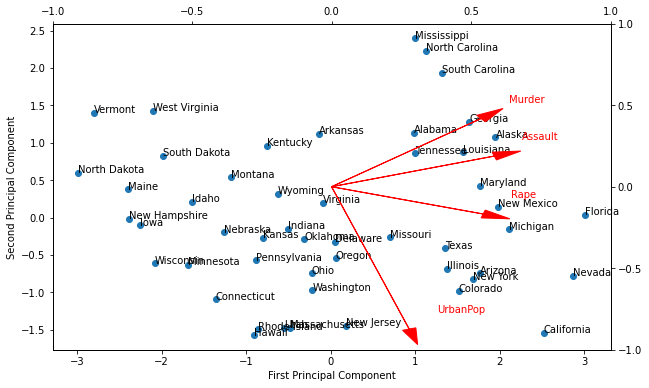

In [121]:
variance_explained, comp_df, fig = pca_calc(X)
comp_df


In [122]:
#### Figure 10.3b Unscaled Data

Total Variance explained = 0.9933515571990574


,PC1,PC2
Murder,0.041704,0.044822
Assault,0.995221,0.058760
UrbanPop,0.046336,-0.976857
Rape,0.075156,-0.200718


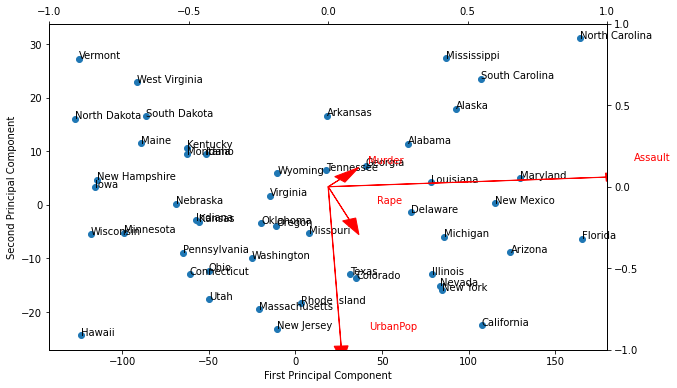

In [123]:
variance_explained_unscaled, comp_df_unscaled, fig_unscaled = pca_calc(data)
comp_df_unscaled


Total Variance explained = 0.9999999999999999


,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


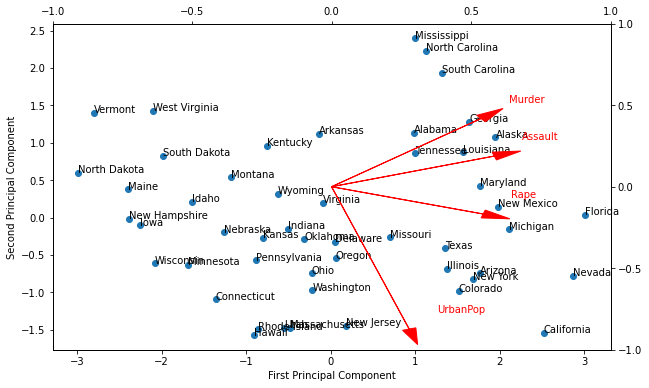

In [149]:
variance_explained, comp_df, _ = pca_calc(X,n_components=4)
comp_df

#### Figure 10.4

Text(0, 0.5, 'Cumlative proportion of Explained Variance')

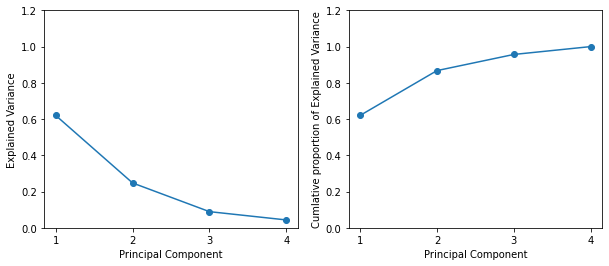

In [148]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax[0].plot(range(1,1+len(variance_explained)), variance_explained,'-o')
ax[1].plot(range(1,1+len(variance_explained)), np.cumsum(variance_explained),'-o')

from matplotlib.ticker import MaxNLocator

for a in ax:
    a.set_ylim([0,1.2])
    a.set_xlabel('Principal Component')
    a.xaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].set_ylabel('Explained Variance')
ax[1].set_ylabel('Cumlative proportion of Explained Variance')